In [9]:
import pandas
from itertools import product
import sys, argparse, os
import numpy as np
from math import log, ceil
from scipy.stats import multinomial, chi2
from math import factorial
import re
import os

In [10]:
from Bio import Phylo
from io import BytesIO     # for handling byte strings
from io import StringIO    # for handling unicode strings

In [11]:
class Bandelt_Node:
    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.data = data
        
    def find_node(self, val):
        if self.data == val:
            return self
        else:
            if (self.left == None) and (self.right == None):
                return None
            if self.left != None:
                find_left = self.left.find_node(val)
                if find_left != None:
                    return find_left
            if self.right != None:
                find_right = self.right.find_node(val)
                if find_right != None:
                    return find_right
            return None
        
    def print_details(self):
        parent_data = self.parent.data if (self.parent != None) else self.parent
        left_data = self.left.data if (self.left != None) else self.left
        right_data = self.right.data if (self.right != None) else self.right
        print("Current Value: ", self.data, "; Parent: ", parent_data, "; left: ", left_data, "; right: ", right_data)
        
    def print_subtree(self, indent_num = 1):
        if indent_num == 1:
            print(self.data)
        if self.left != None:
            print('___'*indent_num, self.left.data)
            self.left.print_subtree(indent_num + 1)
        if self.right != None:
            print('___'*indent_num, self.right.data)
            self.right.print_subtree(indent_num + 1)
            
    def compare_subtree(self, compared_root_node):
        if self.data != compared_root_node.data:
#             print("Current number is not equal!")
            return False
        
        self_left_data = self.left.data if (self.left != None) else None
        self_right_data = self.right.data if (self.right != None) else None

        compared_root_node_left_data = compared_root_node.left.data if (compared_root_node.left != None) else None
        compared_root_node_right_data = compared_root_node.right.data if (compared_root_node.right != None) else None

        
        if (self_left_data in [compared_root_node_left_data, compared_root_node_right_data]) and (self_right_data in [compared_root_node_left_data, compared_root_node_right_data]):
#             print("Children are same !!")
            if (self_left_data == compared_root_node_left_data):
#                 print("Order are same !!")
                if self.left != None:
                    compare_ans_left = self.left.compare_subtree(compared_root_node.left)
                    if not compare_ans_left:
                        return False
                if self.right != None:
                    compare_ans_right = self.right.compare_subtree(compared_root_node.right)
                    if not compare_ans_right:
                        return False
                
            elif (self_left_data == compared_root_node_right_data):
#                 print("Order are not same !!")
                if self.left != None:
                    compare_ans_left = self.left.compare_subtree(compared_root_node.right)
                    if not compare_ans_left:
                        return False
                if self.right != None:
                    compare_ans_right = self.right.compare_subtree(compared_root_node.left)
                    if not compare_ans_right:
                        return False
        else:
#             print("Children are not same !!")
            return False
        return True

In [12]:
def create_Bandelt_Tree(clade, parent_node):
    for idx in range(len(clade)):
        if idx == 0:
            if clade[idx].is_terminal():
                print("This is terminal")
                print(clade[idx].name)
                # Parent add 
#                 parent_node.left = children_node
#                 children_node.parent = parent_node
#                 print(clade[idx].name)
            else:
                print("This is not terminal")
#                 children_node = Bandelt_Node(int(clade[idx].confidence))
#                 parent_node.left = children_node
#                 children_node.parent = parent_node
#                 print(clade[idx].confidence)
        if idx == 1:  
            if clade[idx].is_terminal():
                print("This is terminal")
                print(clade[idx].name)
            else:
                print("This is not terminal")
#         create_Bandelt_Tree(clade[idx], children_node)

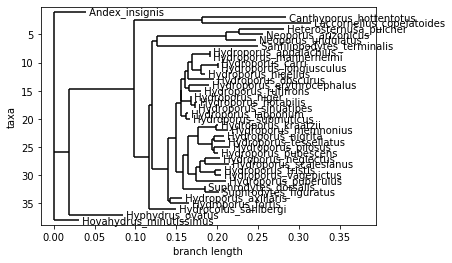

In [13]:
treedata = "(Andex_insignis:0.0392690100,(((Canthyporus_hottentotus:0.1033698787,Laccornellus_copelatoides:0.1341678274):0.0828737525,(((((Heterosternusa_pulcher:0.0546281431,Neoporus_arizonicus:0.0286271651):0.0162554928,Neoporus_undulatus:0.0367128781):0.0846593009,Sanfilippodytes_terminalis:0.1239988700):0.0056385811,((((((((Hydroporus_appalachius:0.0000009994,Hydroporus_mannerheimi:0.0000009994):0.0215343058,((Hydroporus_carri:0.0000009994,Hydroporus_longiusculus:0.0000009994):0.0213403669,Hydroporus_nigellus:0.0055288550):0.0101659723):0.0056485591,Hydroporus_obscurus:0.0318000721):0.0037316970,(Hydroporus_erythrocephalus:0.0238296404,Hydroporus_rufifrons:0.0148196676):0.0054413953):0.0048873843,(Hydroporus_niger:0.0000009994,(Hydroporus_notabilis:0.0022886018,Hydroporus_sinuatipes:0.0000009994):0.0045954938):0.0130562358):0.0000021139,(Hydroporus_lapponum:0.0022460268,Hydroporus_submuticus:0.0048203235):0.0060814500):0.0054552701,((((Hydroporus_kraatzii:0.0033076822,Hydroporus_memnonius:0.0148193979):0.0213808261,((Hydroporus_nigrita:0.0124661765,Hydroporus_tessellatus:0.0141926059):0.0024177392,(Hydroporus_pilosus:0.0199248909,Hydroporus_pubescens:0.0049428518):0.0024358613):0.0164973445):0.0121913801,(((Hydroporus_neglectus:0.0179522817,Hydroporus_scalesianus:0.0290172798):0.0061826316,(Hydroporus_tristis:0.0070753414,Hydroporus_vagepictus:0.0076648147):0.0184039826):0.0054937727,Hydroporus_puberulus:0.0370958750):0.0091571478):0.0061533699,(Suphrodytes_dorsalis:0.0000021139,Suphrodytes_figuratus:0.0170597044):0.0263185007):0.0083233055):0.0099311938,(Hydroporus_axillaris:0.0142101061,Hydroporus_fortis:0.0225239669):0.0023617755):0.0194601202):0.0042758226,Hydrocolus_sahlbergi:0.0330704447):0.0179911238):0.0797919216,Hyphydrus_ovatus:0.0667411144):0.0185718147,Hovahydrus_minutissimus:0.0304204513);"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")
# tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

In [14]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.03926901, name='Andex_insignis')
        Clade(branch_length=0.0185718147)
            Clade(branch_length=0.0797919216)
                Clade(branch_length=0.0828737525)
                    Clade(branch_length=0.1033698787, name='Canthyporus_hottentotus')
                    Clade(branch_length=0.1341678274, name='Laccornellus_copelatoides')
                Clade(branch_length=0.0179911238)
                    Clade(branch_length=0.0042758226)
                        Clade(branch_length=0.0056385811)
                            Clade(branch_length=0.0846593009)
                                Clade(branch_length=0.0162554928)
                                    Clade(branch_length=0.0546281431, name='Heterosternusa_pulcher')
                                    Clade(branch_length=0.0286271651, name='Neoporus_arizonicus')
                                Clade(branch_length=0.0367128781, name='Neoporus_undulatus')


In [15]:
tree.is_bifurcating()

True

In [25]:
folder_list = ['Bergsten_2013']

In [26]:
training_dataset_prefix = "../training_small"

In [27]:
dic={'A':'1', 'T':'2', 'C':'3', 'G':'4', '-':'0', '?':'0'}

In [28]:
all_data_list = []
all_dists_list_cub = []
all_dists_list_flatten = []

In [29]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM - 1) * BRANCH_NUM / 2)

In [30]:
all_seq_data = np.zeros((BRANCH_NUM, SEQUENCE_LEN, 1))

In [36]:
# data preprocessing
for folder in folder_list:
    file_path = os.path.join(training_dataset_prefix, folder)
    files_list = os.listdir(file_path)
    for file in files_list:
        if file.find('.nex.treefile.dist') > 0:
            file_base_name = file[0:file.find('.nex.treefile.dist')]
#             print("******************")
#             print(file_base_name)            
            #######################
            # Input Processing !! #
            #######################
            print("****: ", file_base_name+'.nex')
            seq_data_raw = open(os.path.join(file_path, file_base_name+'.nex'))
            seq_data = seq_data_raw.readlines()[6:]
            all_seq_data_list = []
            all_seq_data = np.zeros((BRANCH_NUM,SEQUENCE_LEN,1))
            for idx, line in enumerate(seq_data):
                curr_line = line.split()
                if len(curr_line) < 2:
                    break
                print(curr_line[0])

****:  alignment_H3_3rdpos-out.nex
Andex_insignis
Canthyporus_hottentotus
Heterosternusa_pulcher
Hovahydrus_minutissimus
Hydrocolus_sahlbergi
Hydroporus_appalachius
Hydroporus_axillaris
Hydroporus_carri
Hydroporus_erythrocephalus
Hydroporus_fortis
Hydroporus_kraatzii
Hydroporus_lapponum
Hydroporus_longiusculus
Hydroporus_mannerheimi
Hydroporus_memnonius
Hydroporus_neglectus
Hydroporus_nigellus
Hydroporus_niger
Hydroporus_nigrita
Hydroporus_notabilis
Hydroporus_obscurus
Hydroporus_pilosus
Hydroporus_puberulus
Hydroporus_pubescens
Hydroporus_rufifrons
Hydroporus_scalesianus
Hydroporus_sinuatipes
Hydroporus_submuticus
Hydroporus_tessellatus
Hydroporus_tristis
Hydroporus_vagepictus
Hyphydrus_ovatus
Laccornellus_copelatoides
Neoporus_arizonicus
Neoporus_undulatus
Sanfilippodytes_terminalis
Suphrodytes_dorsalis
Suphrodytes_figuratus
****:  alignment_H3_2ndpos-out.nex
Andex_insignis
Canthyporus_hottentotus
Heterosternusa_pulcher
Hovahydrus_minutissimus
Hydrocolus_sahlbergi
Hydroporus_appalach

In [8]:
BANDELT_NUM = tree.count_terminals() - 1
root_node = Bandelt_Node(sys.maxsize)
# # inner_root = Bandelt_Node(int(tree.root.confidence))
# root_node.left = inner_root
# inner_root.parent = root_node
create_Bandelt_Tree(tree.root, root_node)

This is terminal
Andex_insignis
This is not terminal
